# Import the libraries for CNN ML

In [1]:
#import the libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from PIL import Image

# Load the dataset

In [2]:
def load_dataset(directory, img_width, img_height):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=0.2,  
        #width_shift_range=0.2,
        #height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2
        #horizontal_flip=True,
    )

    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_width, img_height),
        batch_size=32,
        color_mode='rgb',
        class_mode='categorical')

    return generator

# Create the Model

In [3]:
def create_model():
    model = tf.keras.Sequential()

    # create a CNN model
    model.add(tf.keras.layers.Conv2D(filters=32,
        kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    #model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Conv2D(filters=64,
        kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    #model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Conv2D(filters=128,
        kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    #model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Conv2D(filters=128,
        kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    #model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=1024, activation='relu'))    
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Dense(units=4, activation='softmax'))    

    # build the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                    metrics=['accuracy'])

    return model

# Plot the map

In [4]:
def plot_history(history):
    fig = plt.figure(num=1, figsize=(14,5))
    
    ax1 = fig.add_subplot(211)   
    ax1.plot(history.history['loss'])
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss Curve')
    
    ax2 = fig.add_subplot(212)
    ax2.plot(history.history['accuracy'])
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy Curve')

# Main Program

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

d:\anaconda3\envs\mlaenv\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7/7 [==============================] - 19s 3s/step - loss: 1.8278 - accuracy: 0.3077 - val_loss: 1.2002 - val_accuracy: 0.5333
Epoch 2/15
7/7 [==============================] - 18s 3s/step - loss: 1.0816 - accuracy: 0.5529 - val_loss: 1.0528 - val_accuracy: 0.5667
Epoch 3/15
7/7 [==============================] - 18s 3s/step - loss: 0.8573 - accuracy: 0.6562 - val_loss: 0.7954 - val_accuracy: 0.7000
Epoch 4/15
7/7 [==============================] - 18s 3s/step - loss: 0.6575 - accuracy: 0.7768 - val_loss: 0.5995 - val_accuracy: 0.7833
Epoch 5/15
7/7 [==============================] - 18s 3s/step - loss: 0.4608 - accuracy: 0.8413 - val_loss: 0.4266 - val_accuracy: 0.9000
Epoch 6/15
7/7 [==============================] - 17s 2s/step - loss: 0.3725 - accuracy: 0.8942 - val_loss: 0.4980 - val_accuracy: 0.9167
Epoch 7/15
7/7 [==============================] - 18s 3s/step - loss: 0.3284 - accuracy: 0.8894 - val_loss: 0.5680 - val_accuracy: 0.8333
Epoch 8/15
7/7 [=============================

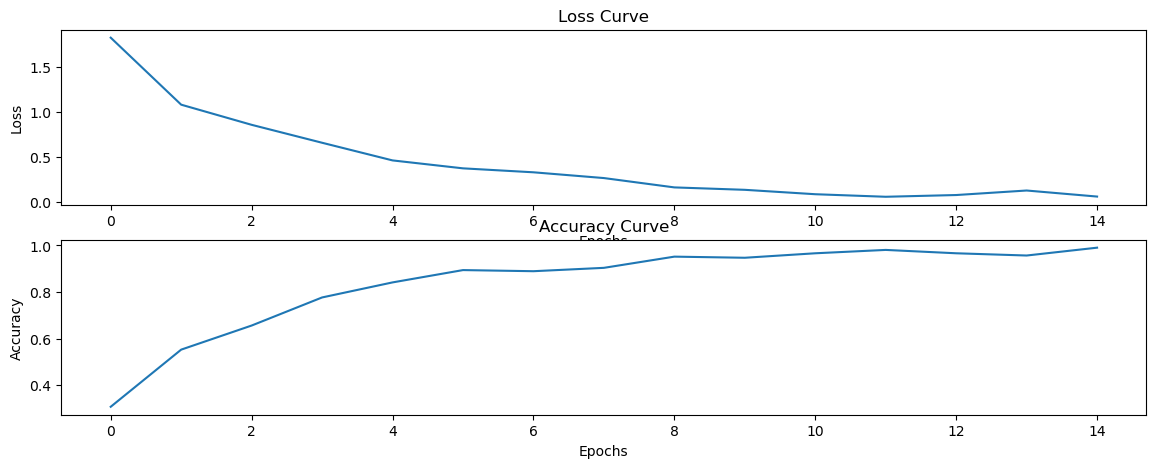

In [5]:
#please alter this path to your own path
train_data_dir = 'train_generator'
test_data_dir = 'test_generator'
img_width = 256
img_height = 256

def main():
    model = create_model()
    print(model.summary())

    train_generator=load_dataset(train_data_dir, img_width, img_height)
    test_generator=load_dataset(test_data_dir, img_width, img_height)

    steps_per_epoch = train_generator.n//train_generator.batch_size
    
    history=model.fit(x=train_generator, steps_per_epoch=steps_per_epoch, epochs=15, validation_data=test_generator)
    model.evaluate(x=test_generator)

    plot_history(history)

if __name__ == "__main__":
    main()